In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow import keras
import cv2


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)


In [6]:
train=train.flow_from_directory('D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\GL-2\Train',target_size=(32,32),batch_size=10,class_mode='binary')


Found 940 images belonging to 2 classes.


In [7]:
test=test.flow_from_directory('D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\GL-2\Valid',target_size=(32,32),batch_size=2,class_mode='binary')


Found 80 images belonging to 2 classes.


Method 1

In [8]:
model=Sequential([
                    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',input_shape=(32,32,3)),
                    Conv2D(filters=128,kernel_size=3,strides=1,activation='relu'),
                    MaxPool2D(),
                    Conv2D(filters=256,kernel_size=3,strides=1,activation='relu'),
                    Conv2D(filters=512,kernel_size=3,strides=1,activation='relu'),
                    MaxPool2D(),
                    Conv2D(filters=1024,kernel_size=3,strides=1,activation='relu'),
                    BatchNormalization(),
                    Flatten(),
                    Dense(units=256,activation='relu'),
                    Dropout(0.2),
                    Dense(units=128,activation='relu'),
                    Dropout(0.2),
                    Dense(units=64,activation='relu'),
                    Dropout(0.2),
                    Dense(units=32,activation='relu'),
                    Dense(units=1,activation='sigmoid')
    
])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

keras_callback=[EarlyStopping(monitor='val_loss',patience=10,mode='min',min_delta=0.001),
               ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)]

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
a=model.fit(train,epochs=100,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test),callbacks=keras_callback)

Train for 94 steps, validate for 40 steps
Epoch 1/100
94/94 [==============================] - 10s 112ms/step - loss: 0.9280 - accuracy: 0.5298 - val_loss: 2.9149 - val_accuracy: 0.5000
Epoch 2/100
94/94 [==============================] - 8s 87ms/step - loss: 0.7982 - accuracy: 0.5500 - val_loss: 0.9492 - val_accuracy: 0.5375
Epoch 3/100
94/94 [==============================] - 5s 52ms/step - loss: 0.7850 - accuracy: 0.5383 - val_loss: 4.8417 - val_accuracy: 0.5000
Epoch 4/100
94/94 [==============================] - 5s 51ms/step - loss: 0.7655 - accuracy: 0.5415 - val_loss: 0.7625 - val_accuracy: 0.5500
Epoch 5/100
94/94 [==============================] - 5s 50ms/step - loss: 0.7199 - accuracy: 0.5447 - val_loss: 0.7080 - val_accuracy: 0.5750
Epoch 6/100
94/94 [==============================] - 5s 51ms/step - loss: 0.6861 - accuracy: 0.5745 - val_loss: 0.7898 - val_accuracy: 0.4500
Epoch 7/100
93/94 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5892
Epoch 000

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 512)       1180160   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 1024)       

In [10]:
model.evaluate(train)

94/94 [==============================] - 3s 31ms/step - loss: 0.5827 - accuracy: 0.6883


[0.5827136997212755, 0.68829787]

In [11]:
model.evaluate(test)

40/40 [==============================] - 1s 13ms/step - loss: 0.7514 - accuracy: 0.5875


[0.7513516567647457, 0.5875]

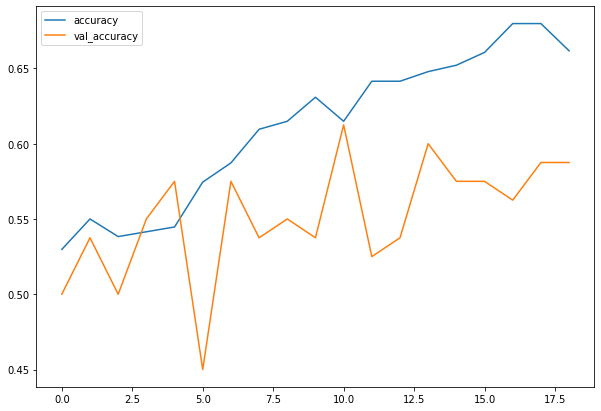

In [12]:
import pandas as pd
b=pd.DataFrame(a.history)
c=b[['accuracy','val_accuracy']]
c.plot(figsize=(10,7));

In [13]:
model.save("model1")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model1\assets


<IPython.core.display.Javascript object>

[[1.]]
wolf


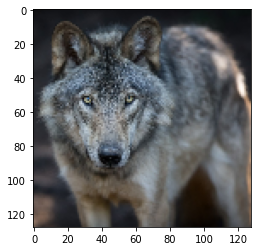

In [43]:
from tensorflow.keras.models import load_model#model2 wrong prediction going to change the data 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import numpy as np
import h5py
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
img = image.load_img("D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\wolves\\09e95736-bfac-11e9-8f25-9b5536624008_image_hires_063817.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img1 = np.expand_dims(img, axis=0)
images = np.vstack([img1])

# dimensions of our images
img_width, img_height = 32, 32

# load the model we saved
model = load_model("D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\model1")
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# predicting images
img = image.load_img('D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\wolves\\09e95736-bfac-11e9-8f25-9b5536624008_image_hires_063817.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes)
if classes<0.5:
    print("Dog")
else:
    print('wolf')


<IPython.core.display.Javascript object>

[[1.]]
wolf


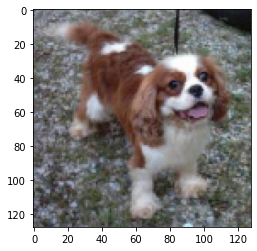

In [44]:
from tensorflow.keras.models import load_model#model2 wrong prediction going to change the data 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import numpy as np
import h5py
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
img = image.load_img("D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\dogs\\n02086646_3172.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img1 = np.expand_dims(img, axis=0)
images = np.vstack([img1])

# dimensions of our images
img_width, img_height = 32, 32

# load the model we saved
model = load_model("D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\model1")
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# predicting images
img = image.load_img('D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\dogs\\n02086646_3172.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes)
if classes<0.5:
    print("Dog")
else:
    print('wolf')


# Method 2 Transfer Learning using  MobileNetv2

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)


In [21]:
train=train.flow_from_directory('D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\GL-2\Train',target_size=(32,32),batch_size=10,class_mode='binary')


Found 940 images belonging to 2 classes.


In [22]:
test=test.flow_from_directory('D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\GL-2\Valid',target_size=(32,32),batch_size=2,class_mode='binary')


Found 80 images belonging to 2 classes.


In [45]:
b=tf.keras.applications.MobileNet(input_shape=(32,32,3),include_top=False,weights='imagenet')
b.summary()

C:\Users\shari\anaconda3\envs\TensorFlow(GPU)\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32) 

In [46]:
b.layers[-1].trainable=False

In [47]:
b.layers[-1].trainable

False

In [48]:
model=Sequential([
                    b,
                    Flatten(),
                    Dense(units=1024,activation='relu'),
                    Dense(units=512,activation='relu'),
                    Dropout(0.2),
                    Dense(units=256,activation='relu'),
                    Dense(units=128,activation='relu'),
                    Dropout(0.2),
                    Dense(units=32,activation='relu'),
                    Dense(units=1,activation='sigmoid')
])

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1, 1, 1024)        3228864   
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

keras_callback=[EarlyStopping(monitor='val_loss',patience=10,mode='min',min_delta=0.001),
               ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)]

In [51]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
a=model.fit(train,epochs=100,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test),callbacks=keras_callback)

Train for 94 steps, validate for 40 steps
Epoch 1/100
94/94 [==============================] - 11s 122ms/step - loss: 0.7035 - accuracy: 0.6085 - val_loss: 0.7400 - val_accuracy: 0.5000
Epoch 2/100
94/94 [==============================] - 4s 43ms/step - loss: 0.5575 - accuracy: 0.7319 - val_loss: 0.5777 - val_accuracy: 0.6375
Epoch 3/100
94/94 [==============================] - 4s 43ms/step - loss: 0.4425 - accuracy: 0.8160 - val_loss: 0.5893 - val_accuracy: 0.7125
Epoch 4/100
94/94 [==============================] - 4s 44ms/step - loss: 0.3820 - accuracy: 0.8500 - val_loss: 0.5390 - val_accuracy: 0.6875
Epoch 5/100
94/94 [==============================] - 4s 43ms/step - loss: 0.3535 - accuracy: 0.8585 - val_loss: 0.5204 - val_accuracy: 0.7250
Epoch 6/100
94/94 [==============================] - 4s 44ms/step - loss: 0.3234 - accuracy: 0.8702 - val_loss: 0.6060 - val_accuracy: 0.7375
Epoch 7/100
94/94 [==============================] - 4s 44ms/step - loss: 0.3289 - accuracy: 0.8745 - va

In [52]:
model.evaluate(train)

94/94 [==============================] - 3s 33ms/step - loss: 0.1186 - accuracy: 0.9564


[0.11862477241827056, 0.956383]

In [53]:
model.evaluate(test)

40/40 [==============================] - 1s 17ms/step - loss: 0.7816 - accuracy: 0.7750


[0.7816039797129634, 0.775]

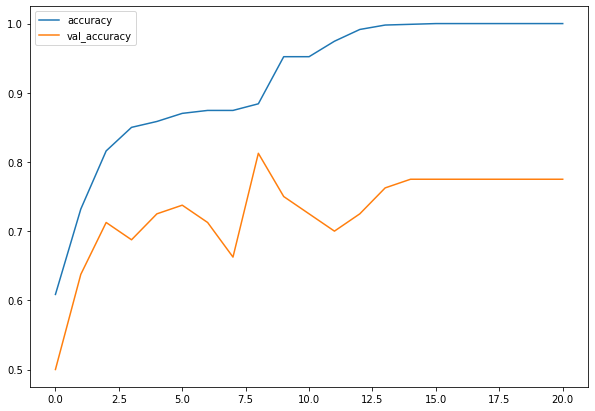

In [54]:
import pandas as pd
b=pd.DataFrame(a.history)
c=b[['accuracy','val_accuracy']]
c.plot(figsize=(10,7));

In [55]:
model.save("model2")

INFO:tensorflow:Assets written to: model2\assets


<IPython.core.display.Javascript object>

[[0.02087954]]
wolf


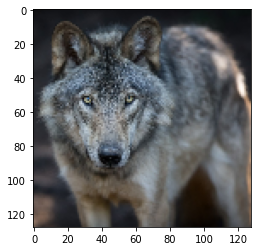

In [59]:
from tensorflow.keras.models import load_model#model2 wrong prediction going to change the data 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import numpy as np
import h5py
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
img = image.load_img("D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\wolves\\09e95736-bfac-11e9-8f25-9b5536624008_image_hires_063817.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img1 = np.expand_dims(img, axis=0)
images = np.vstack([img1])

# dimensions of our images
img_width, img_height = 32, 32

# load the model we saved
model = load_model("D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\model2")
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# predicting images
img = image.load_img('D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\wolves\\09e95736-bfac-11e9-8f25-9b5536624008_image_hires_063817.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes)
if classes>0.5:
    print("Dog")
else:
    print('wolf')


<IPython.core.display.Javascript object>

[[1.]]
Dog


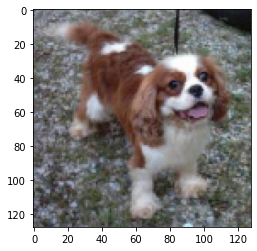

In [58]:
from tensorflow.keras.models import load_model#model2 wrong prediction going to change the data 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import numpy as np
import h5py
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
img = image.load_img("D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\dogs\\n02086646_3172.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img1 = np.expand_dims(img, axis=0)
images = np.vstack([img1])

# dimensions of our images
img_width, img_height = 32, 32

# load the model we saved
model = load_model("D:\sharikhh\Data Science\Great Learning\Deep Learning\Practice\model1")
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# predicting images
img = image.load_img('D:\\sharikhh\\Data Science\\Great Learning\\Deep Learning\\Practice\\GL-2\\Train\\dogs\\n02086646_3172.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes)
if classes>0.5:
    print("Dog")
else:
    print('wolf')
